### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [1]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import warnings
import csv
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pip install matplotlib


In [4]:
def get_weather_forecast(url,city):
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    filename = city + '_weather_forecast.csv'
    csv_file = open(filename, 'w')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['day','min', 'max'])
    for article in soup.find_all("div", class_="DetailsSummary--DetailsSummary--1DqhO DetailsSummary--fadeOnOpen--KnNyF"):
        dayt = article.find('h3').text
        mint = article.find('span',class_='DetailsSummary--highTempValue--3PjlX').text
        maxt = article.find('span',class_='DetailsSummary--lowTempValue--2tesQ').text
        csv_writer.writerow([dayt,mint, maxt])
    csv_file.close()

In [11]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [5]:
source = 'https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111'
city="benguerir"
get_weather_forecast(source,city)

In [6]:
source = 'https://weather.com/weather/tenday/l/d85f06e72cf2831588a6321bed1d67ed17af1d3d7fe060cc7f2c5ccbfa35e911'
city="tanger"
get_weather_forecast(source,city)

In [7]:
import pandas as pd
databenguerir = pd.read_csv('benguerir_weather_forecast.csv',encoding= 'unicode_escape')
datatanger = pd.read_csv('tanger_weather_forecast.csv', encoding= 'unicode_escape')
databenguerir=databenguerir.iloc[1:11]
datatanger=datatanger.iloc[1:11]

In [8]:
# remove the `°` character from the `min` and `max` columns
databenguerir['min'] = databenguerir['min'].str.replace('°', '')
databenguerir['max'] = databenguerir['max'].str.replace('°', '')
datatanger['min'] = datatanger['min'].str.replace('°', '')
datatanger['max'] = datatanger['max'].str.replace('°', '')

In [9]:
#type of data columns
print(databenguerir.dtypes)
print(datatanger.dtypes)

day    object
min    object
max    object
dtype: object
day    object
min    object
max    object
dtype: object


In [10]:
#convert the data type of the columns to int
databenguerir['min'] = databenguerir['min'].astype(float)
databenguerir['max'] = databenguerir['max'].astype(float)
datatanger['min'] = datatanger['min'].astype(float)
datatanger['max'] = datatanger['max'].astype(float)

In [11]:
databenguerir['average'] = (databenguerir['min'] + databenguerir['max'])/2
datatanger['average'] = (datatanger['min'] + datatanger['max'])/2

In [12]:
databenguerir.head()


,day,min,max,average
1,Sun 01,73.0,45.0,59.0
2,Mon 02,71.0,47.0,59.0
3,Tue 03,69.0,44.0,56.5
4,Wed 04,69.0,43.0,56.0
5,Thu 05,71.0,42.0,56.5


In [13]:
datatanger.head()


,day,min,max,average
1,Sun 01,71.0,57.0,64.0
2,Mon 02,68.0,54.0,61.0
3,Tue 03,64.0,58.0,61.0
4,Wed 04,68.0,58.0,63.0
5,Thu 05,68.0,55.0,61.5


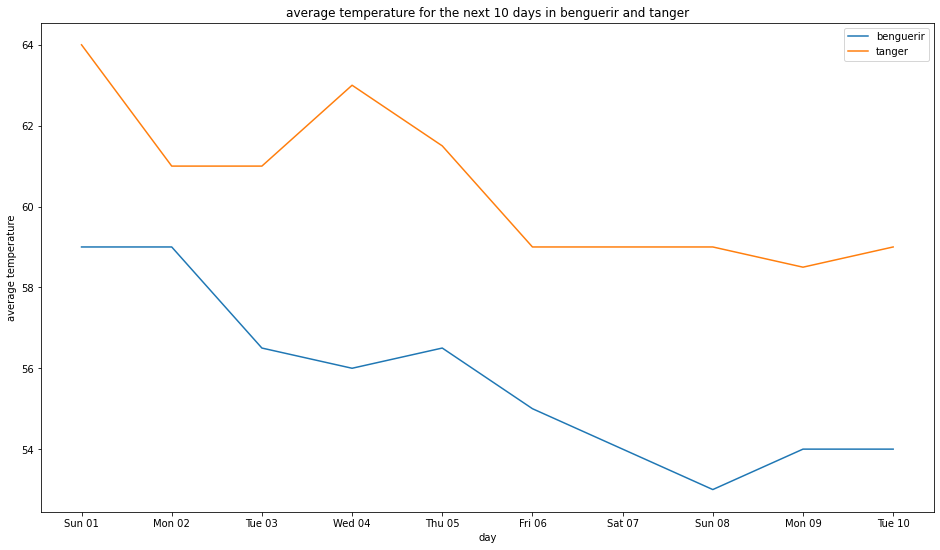

In [14]:
plt.figure(figsize=(16,9))
plt.plot(databenguerir['day'],databenguerir['average'],label='benguerir')
plt.plot(datatanger['day'],datatanger['average'],label='tanger')
plt.xlabel('day')
plt.ylabel('average temperature')
plt.title('average temperature for the next 10 days in benguerir and tanger')
plt.legend()
plt.show()

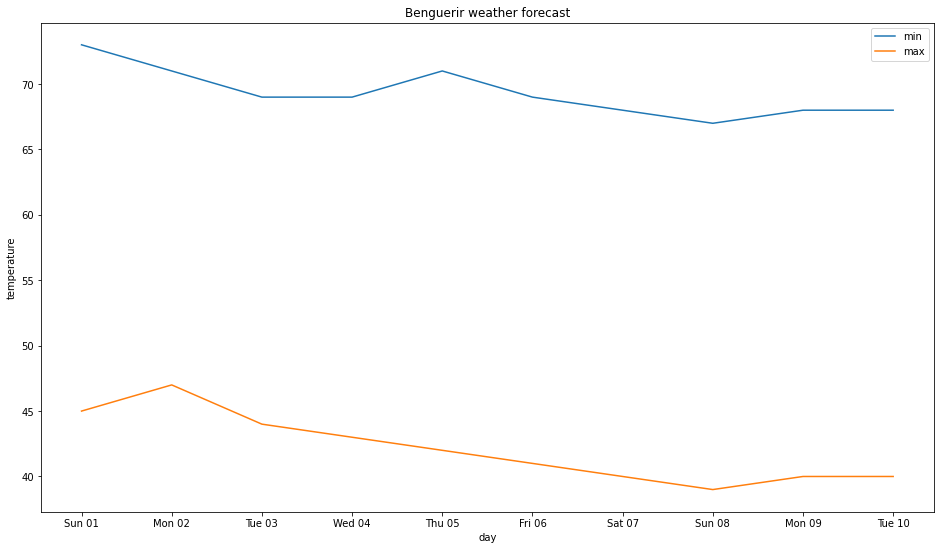

In [15]:
plt.figure(figsize=(16,9))
plt.plot(databenguerir['day'],databenguerir['min'],label='min')
plt.plot(databenguerir['day'],databenguerir['max'],label='max')
plt.legend()
plt.title('Benguerir weather forecast')
plt.xlabel('day')
plt.ylabel('temperature')
plt.show()

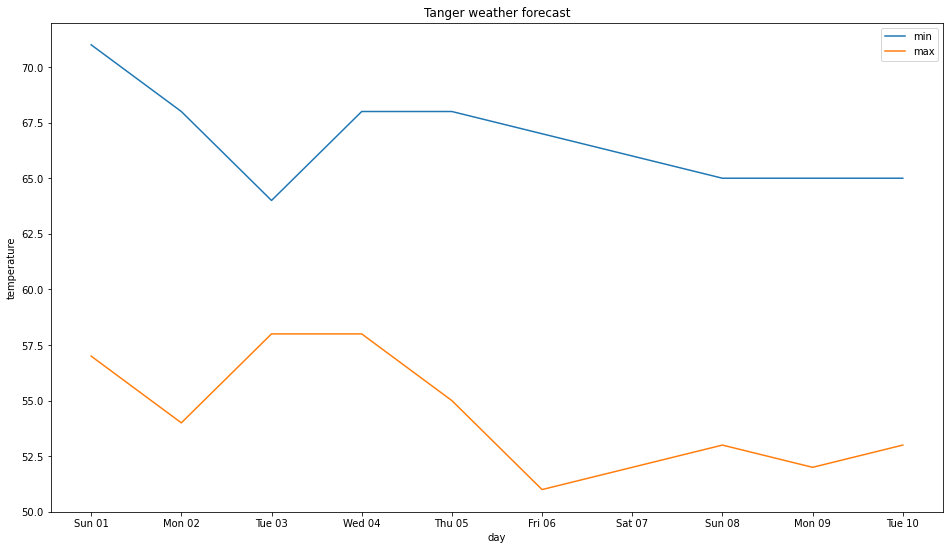

In [16]:
plt.figure(figsize=(16,9))
plt.plot(datatanger['day'],datatanger['min'],label='min')
plt.plot(datatanger['day'],datatanger['max'],label='max')
plt.legend()
plt.title('Tanger weather forecast')
plt.xlabel('day')
plt.ylabel('temperature')
plt.show()